In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
#한글 폰트를 가져오기 위한 코드 외울 필요 없다. 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [10]:
os.chdir(r'C:\Users\injoo\광주 인공지능 사관학교\실습 파일\라이브러리 실습\________\data')

In [11]:
df = pd.read_csv("data_population.csv", encoding="euc-kr")  #한글이 들어있는 경우 인코딩을 해줘야한다. 

In [12]:
df.head()

,Unnamed: 0,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
0,1,서울특별시,,10078850,4197478,2.40,4962774,5116076,0.97
1,2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
2,3,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
3,4,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
4,5,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99


In [13]:
df.shape

(281, 9)

In [14]:
#각 시 같은 경우는 각 구를 합한 것이다. 중복. 
df = pd.read_csv('data_population.csv', encoding="euc-kr", na_values=[' '])  #빈칸이 있으면 NaN으로 표시하게 한다

In [15]:
df.tail()

,Unnamed: 0,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
276,277,경상남도,거창군,63069,27724,2.27,30582,32487,0.94
277,278,경상남도,합천군,48856,24193,2.02,23231,25625,0.91
278,279,제주특별자치도,NaN,615250,251478,2.45,308627,306623,1.01
279,280,제주특별자치도,제주시,454673,182709,2.49,227549,227124,1.00
280,281,제주특별자치도,서귀포시,160577,68769,2.34,81078,79499,1.02


In [19]:
df.drop(columns=["Unnamed: 0"], inplace=True) #inplace를 붙여야만 항구적으로 결과가 남는다

In [20]:
df.shape

(281, 8)

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(263, 8)

In [25]:
df[df["Province"]=="충청남도"].Population.sum()  #충청남도의 인구 가져오기 

2671383

In [27]:
df[(df.Province=="충청북도") | (df.Province=="충청남도")].Population.sum() #충청북도 혹은 충청남도


5085951

In [28]:
df.groupby("Province").Population.sum()

Province
강원도         1547166
경기도        18723822
경상남도        4428762
경상북도        3215695
광주광역시       1476974
대구광역시       2491137
대전광역시       1525656
부산광역시       3517491
서울특별시      10078850
울산광역시       1169768
인천광역시       2914271
전라남도        1902638
전라북도        2523806
제주특별자치도      615250
충청남도        2671383
충청북도        2414568
Name: Population, dtype: int64

성비 기준으로 남자가 많고(GenderRation>1) 1인 가구가 많은 (PersInHou<2)인 도시:

In [30]:
dfb = df[ (df.GenderRatio>1) & (df.PersInHou<2)]

In [31]:
dfb

,Province,City,Population,Households,PersInHou,Male,Female,GenderRatio
62,인천광역시,옹진군,20825,11172,1.86,11715,9110,1.29
149,강원도,화천군,26790,13433,1.99,14989,11801,1.27
152,강원도,고성군,30066,15485,1.94,16109,13957,1.15
167,충청북도,괴산군,38027,19145,1.99,19309,18718,1.03
227,전라남도,신안군,43566,22248,1.96,22899,20667,1.11
253,경상북도,울릉군,10304,5365,1.92,5518,4786,1.15


In [35]:
genderratio = dfb.GenderRatio
genderratio

62     1.29
149    1.27
152    1.15
167    1.03
227    1.11
253    1.15
Name: GenderRatio, dtype: float64

In [36]:
city = dfb.City
city

62     옹진군 
149    화천군 
152    고성군 
167    괴산군 
227    신안군 
253    울릉군 
Name: City, dtype: object

In [40]:
dfc = pd.DataFrame({"GenderRatio": list(genderratio)}, index= list(city))
dfc

,GenderRatio
옹진군,1.29
화천군,1.27
고성군,1.15
괴산군,1.03
신안군,1.11
울릉군,1.15


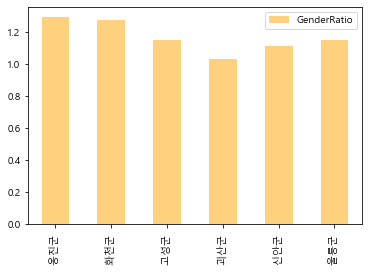

In [42]:
dfc.plot.bar(color="orange", alpha=0.5)
plt.show()

In [44]:
dfc.sort_values(by="GenderRatio", ascending=True)

,GenderRatio
괴산군,1.03
신안군,1.11
고성군,1.15
울릉군,1.15
화천군,1.27
옹진군,1.29


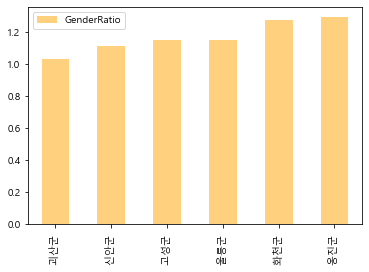

In [45]:
dfc.sort_values(by="GenderRatio", ascending=True).plot.bar(color="orange", alpha=0.5)
plt.show()

In [46]:
type(dfc)

pandas.core.frame.DataFrame

In [47]:
type(genderratio)

pandas.core.series.Series

In [49]:
genderratio.index = city.values

In [50]:
genderratio

옹진군     1.29
화천군     1.27
고성군     1.15
괴산군     1.03
신안군     1.11
울릉군     1.15
Name: GenderRatio, dtype: float64

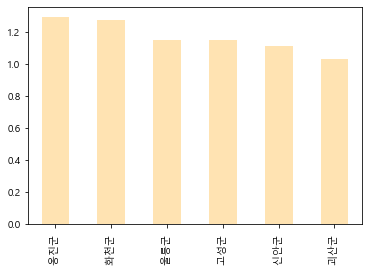

In [51]:
genderratio.sort_values(ascending=False).plot.bar(color="orange", alpha=0.3)
plt.show()